<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22ML_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Выбрали датасет, связанный с циррозом печени. Ссылка на датасет** - https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

In [ ]:
# Импортируем библиотеку pandas для работы с табличными данными.
# Импортируем библиотеку matplotlib и seaborn для визуализации данных.
# Читаем csv файл и выводим результат на экран.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
sns.set()


df_cirroz = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/cirrhosis.csv")
print(df_cirroz)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C          

In [ ]:
# Выводим статистическую информацию об этом датасете.
print(df_cirroz.describe())

               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

In [ ]:
# Выводим название столбцов и строк.
print(df_cirroz.columns)
print()
print(df_cirroz.index)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

RangeIndex(start=0, stop=418, step=1)


**Предобработка данных:**

1 - Удаляем все строки, в которых были пропущенные значения, из столбца с лекарствами.

2 - Сопоставяем пропущенные значения со средними результатами.

3 - Заменяем категориальные данные количественными.

In [ ]:
df_cirroz.dropna(subset=['Drug'], inplace=True)
#print(df_cirroz.isnull().sum()) # пропущенные значения в Cholesterol, Tryglicerides, Copper, Platelets

df_cirroz['Cholesterol'].fillna(df_cirroz['Cholesterol'].mean(), inplace = True)
df_cirroz['Tryglicerides'].fillna(df_cirroz['Tryglicerides'].mean(), inplace = True)
df_cirroz['Copper'].fillna(df_cirroz['Copper'].mean(), inplace = True)
df_cirroz['Platelets'].fillna(df_cirroz['Platelets'].mean(), inplace = True)

#print(df_cirroz.isnull().sum()) # теперь пустых значений нет

# столбец Status
df_cirroz['Status'] = df_cirroz['Status'].replace('D', 0)
df_cirroz['Status'] = df_cirroz['Status'].replace('C', 1)
df_cirroz['Status'] = df_cirroz['Status'].replace('CL', 2)

# столбец Sex
df_cirroz['Sex'] = df_cirroz['Sex'].replace('M', 0)
df_cirroz['Sex'] = df_cirroz['Sex'].replace('F', 1)

# столбец Drug
df_cirroz['Drug'] = df_cirroz['Drug'].replace('D-penicillamine', -1)
df_cirroz['Drug'] = df_cirroz['Drug'].replace('Placebo', 1)

# столбец Ascites
df_cirroz['Ascites'] = df_cirroz['Ascites'].replace('N', -1)
df_cirroz['Ascites'] = df_cirroz['Ascites'].replace('Y', 1)

# столбец Hepatomegaly
df_cirroz['Hepatomegaly'] = df_cirroz['Hepatomegaly'].replace('N', -1)
df_cirroz['Hepatomegaly'] = df_cirroz['Hepatomegaly'].replace('Y', 1)

# столбец Spiders
df_cirroz['Spiders'] = df_cirroz['Spiders'].replace('N', -1)
df_cirroz['Spiders'] = df_cirroz['Spiders'].replace('Y', 1)

# столбец Edema
df_cirroz['Edema'] = df_cirroz['Edema'].replace('N', 0)
df_cirroz['Edema'] = df_cirroz['Edema'].replace('S', 1)
df_cirroz['Edema'] = df_cirroz['Edema'].replace('Y', 2)

df_cirroz['Age'] = df_cirroz['Age']/365

print(df_cirroz)



      ID  N_Days  Status  Drug        Age  Sex  Ascites  Hepatomegaly  \
0      1     400       0    -1  58.805479    1        1             1   
1      2    4500       1    -1  56.484932    1       -1             1   
2      3    1012       0    -1  70.120548    0       -1            -1   
3      4    1925       0    -1  54.778082    1       -1             1   
4      5    1504       2     1  38.131507    1       -1             1   
..   ...     ...     ...   ...        ...  ...      ...           ...   
307  308    1153       1    -1  61.224658    1       -1             1   
308  309     994       1     1  58.339726    1       -1            -1   
309  310     939       1    -1  62.375342    1       -1            -1   
310  311     839       1    -1  38.024658    1       -1            -1   
311  312     788       1     1  33.175342    1       -1            -1   

     Spiders  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0          1      2       14.5        261.0     2

**Визуализация данных.**

(array([ 8., 31., 38., 51., 53., 59., 35., 21., 12.,  4.]),
 array([26.29589041, 31.51561644, 36.73534247, 41.95506849, 47.17479452,
        52.39452055, 57.61424658, 62.8339726 , 68.05369863, 73.27342466,
        78.49315068]),
 <BarContainer object of 10 artists>)

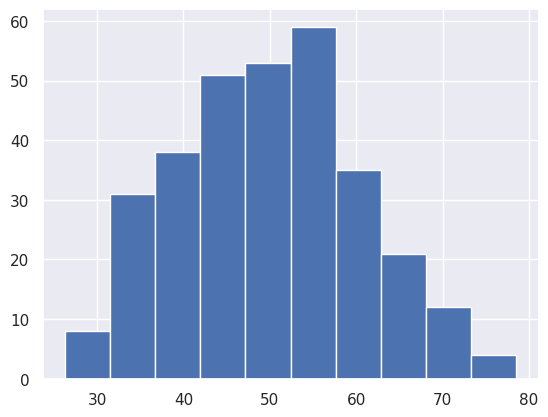

In [ ]:
plt.hist(df_cirroz['Age']) # гистограмма по возрасту


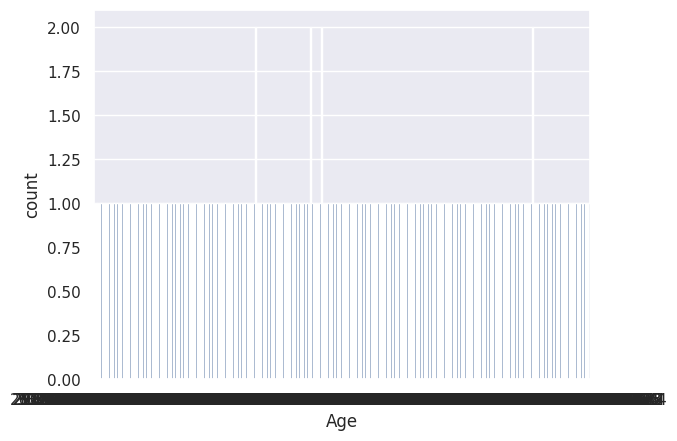

In [ ]:
sns.countplot(x = df_cirroz["Age"]);

<Axes: xlabel='Sex', ylabel='count'>

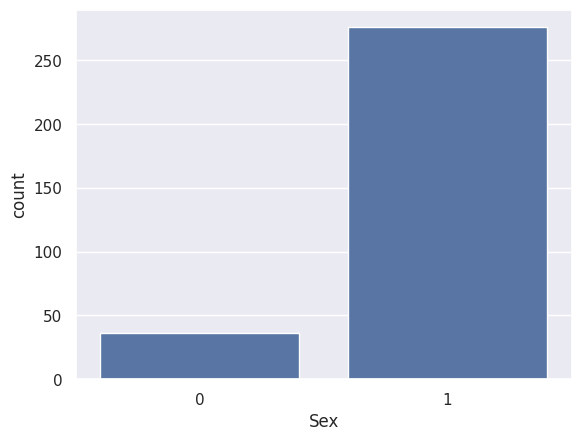

In [ ]:
sns.countplot(x = df_cirroz['Sex']) # гистограмма по полу
# 0 - мужчины
# 1 - женщины

(array([ 36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 276.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

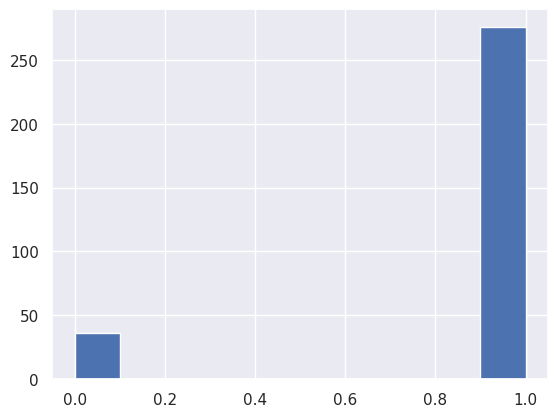

In [ ]:
plt.hist(df_cirroz['Sex'])

(array([25., 33., 45., 53., 38., 42., 24., 20., 16., 16.]),
 array([  41. ,  492.5,  944. , 1395.5, 1847. , 2298.5, 2750. , 3201.5,
        3653. , 4104.5, 4556. ]),
 <BarContainer object of 10 artists>)

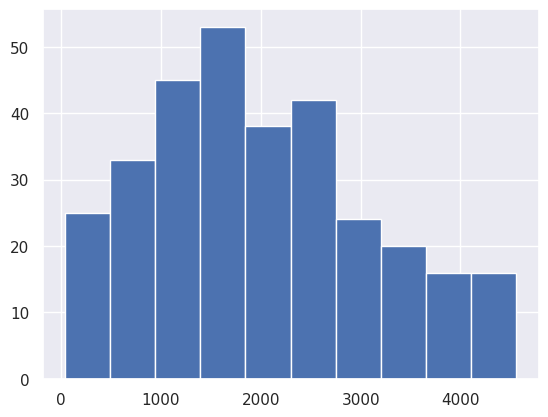

In [ ]:
plt.hist(df_cirroz['N_Days'])
# количество дней между регистрацией и более ранним моментом смерти,
# трансплантации или анализа исследования в июле 1986 г.

<Axes: xlabel='N_Days', ylabel='count'>

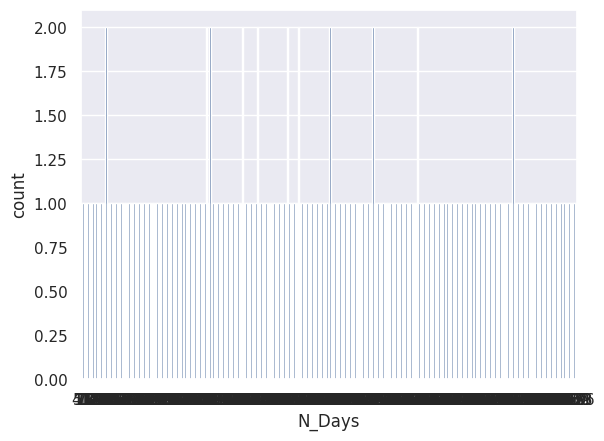

In [ ]:
sns.countplot(x = df_cirroz['N_Days'])

(array([125.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,  19.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

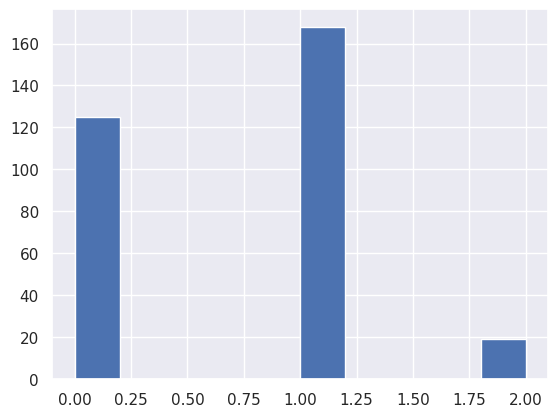

In [ ]:
plt.hist(df_cirroz['Status']) # по статусу

<Axes: xlabel='Status', ylabel='count'>

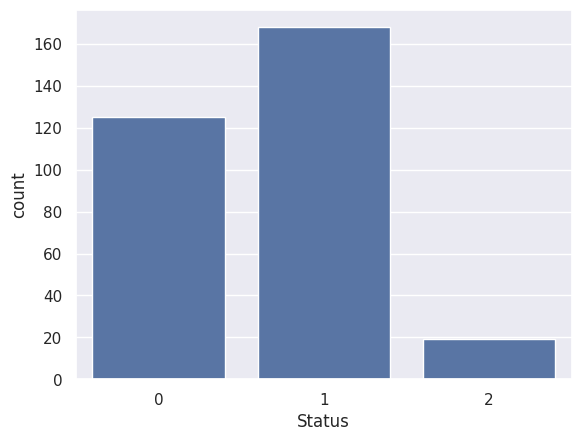

In [ ]:
sns.countplot(x = df_cirroz['Status'])
# 0 - D(смерть)
# 1 - C(подвергнут цензуре)
# 2 - СL(подвергнут цензуре из-за повреждения печени))

(array([158.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 154.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

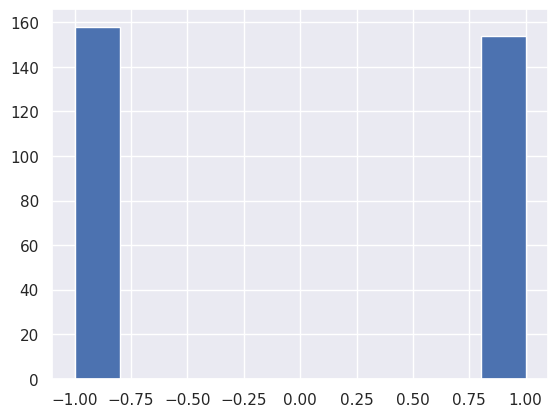

In [ ]:
plt.hist(df_cirroz['Drug']) # по лекарствам

<Axes: xlabel='Drug', ylabel='count'>

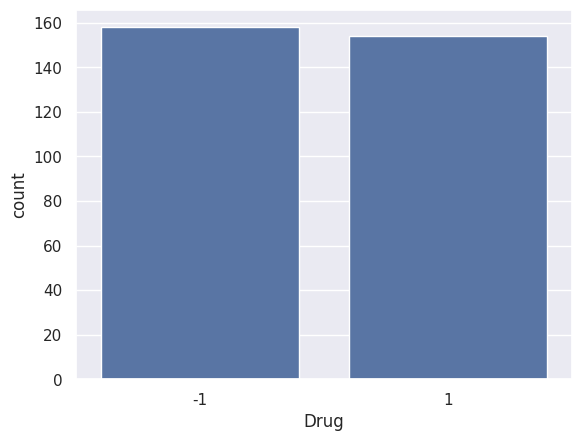

In [ ]:
sns.countplot(x = df_cirroz['Drug'])
# -1 - D-пеницилламин
#  1 - плацебо

(array([288.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

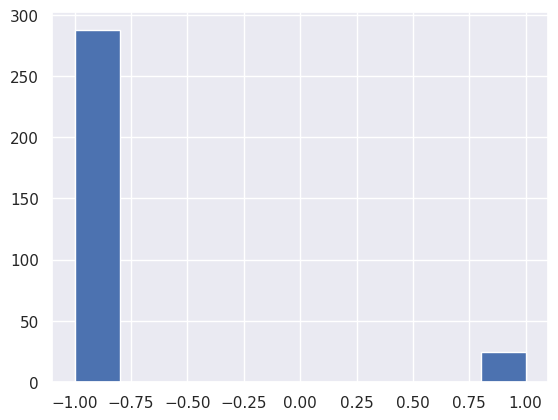

In [ ]:
plt.hist(df_cirroz['Ascites']) # по Асциту

<Axes: xlabel='Ascites', ylabel='count'>

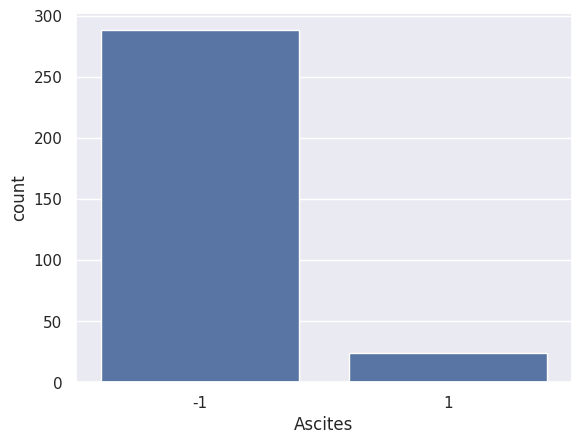

In [ ]:
sns.countplot(x = df_cirroz['Ascites'])
# наличие асцита
# -1 - Нет
#  1 - Да

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

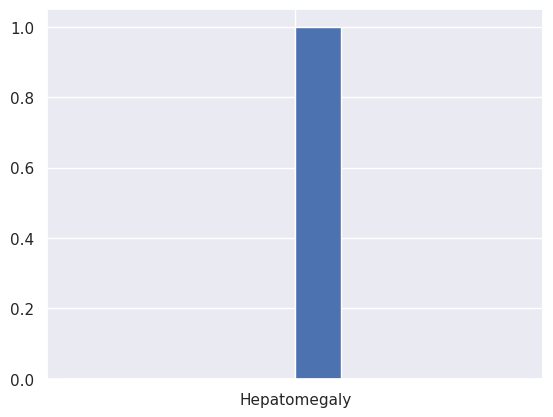

In [ ]:
plt.hist('Hepatomegaly')

<Axes: xlabel='Hepatomegaly', ylabel='count'>

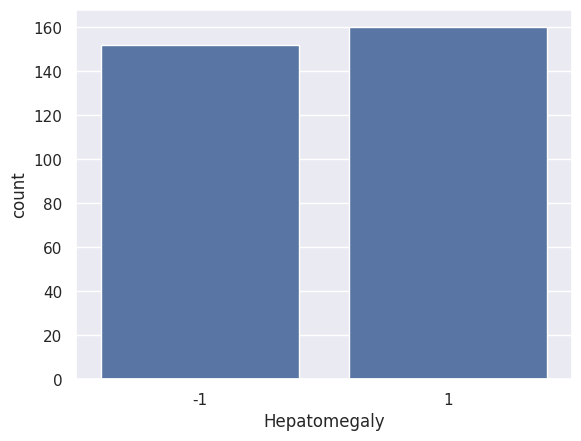

In [ ]:
sns.countplot(x = df_cirroz['Hepatomegaly'])
# наличие Гепатомегалия
# -1 - Нет
#  1 - Да

(array([222.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  90.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

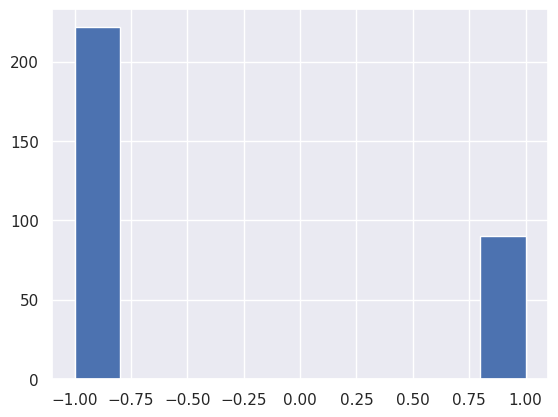

In [ ]:
plt.hist(df_cirroz['Spiders'])

<Axes: xlabel='Spiders', ylabel='count'>

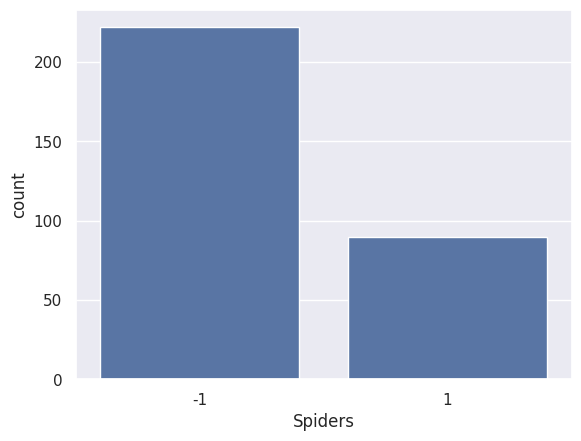

In [ ]:
sns.countplot(x = df_cirroz['Spiders'])
# наличие Пауков
# -1 - Нет
#  1 - Да

(array([263.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,  20.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

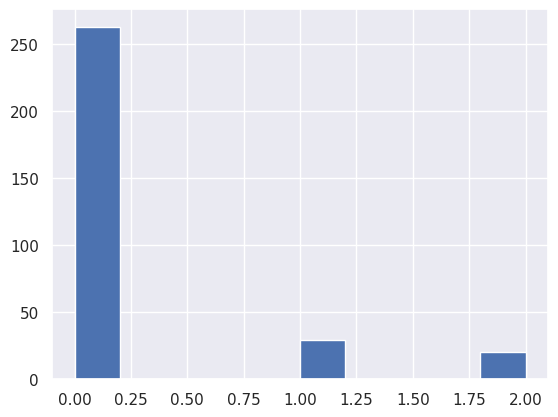

In [ ]:
plt.hist(df_cirroz['Edema']) # по Edema - отёк тканей

<Axes: xlabel='Edema', ylabel='count'>

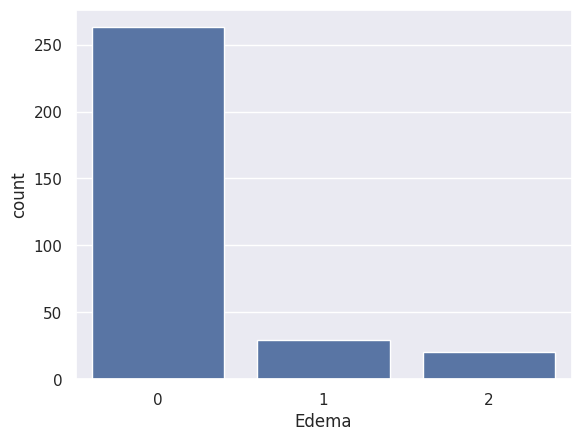

In [ ]:
sns.countplot(x = df_cirroz['Edema'])
# наличик отёка
# 0 - N(отсутствие отека и отсутствие диуретической терапии отека)
# 1 - S(отек присутствует без диуретиков или отек устраняется диуретиками)
# 2 - Y (отек, несмотря на диуретическую терапию)

(array([217.,  47.,  23.,   3.,   7.,   3.,   6.,   2.,   2.,   2.]),
 array([ 0.3 ,  3.07,  5.84,  8.61, 11.38, 14.15, 16.92, 19.69, 22.46,
        25.23, 28.  ]),
 <BarContainer object of 10 artists>)

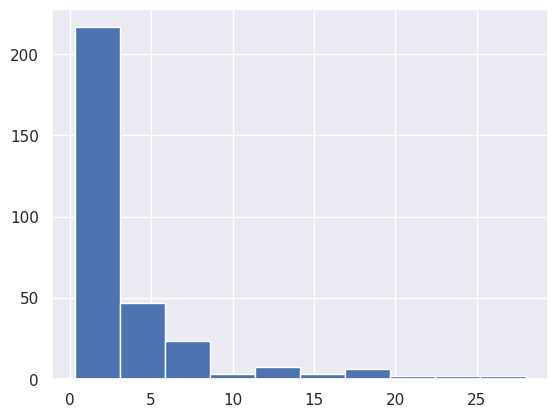

In [ ]:
plt.hist(df_cirroz['Bilirubin'])
# сывороточный билирубин

<Axes: xlabel='Bilirubin', ylabel='count'>

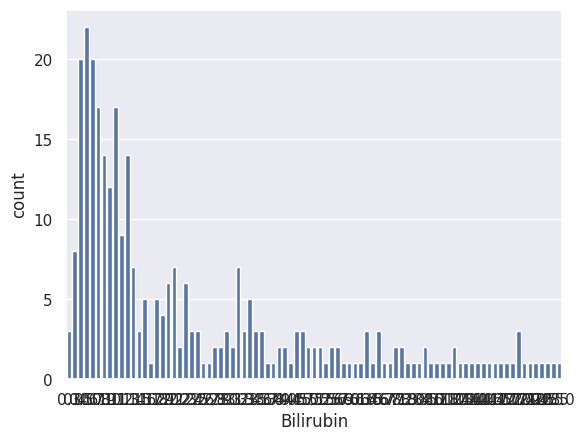

In [ ]:
sns.countplot(x = df_cirroz['Bilirubin'])

(array([118., 146.,  28.,   6.,   3.,   4.,   2.,   1.,   2.,   2.]),
 array([ 120. ,  285.5,  451. ,  616.5,  782. ,  947.5, 1113. , 1278.5,
        1444. , 1609.5, 1775. ]),
 <BarContainer object of 10 artists>)

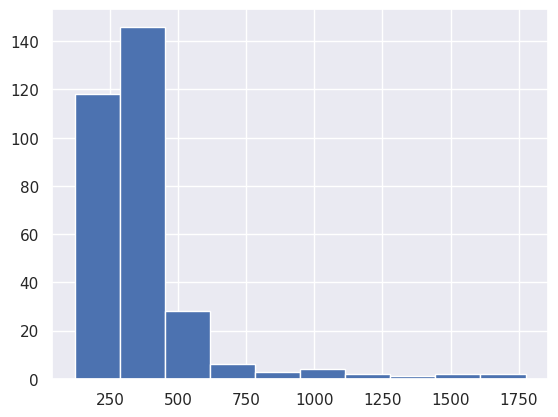

In [ ]:
plt.hist(df_cirroz['Cholesterol'])
# уровень холестерина в сыворотке крови

<Axes: xlabel='Cholesterol', ylabel='count'>

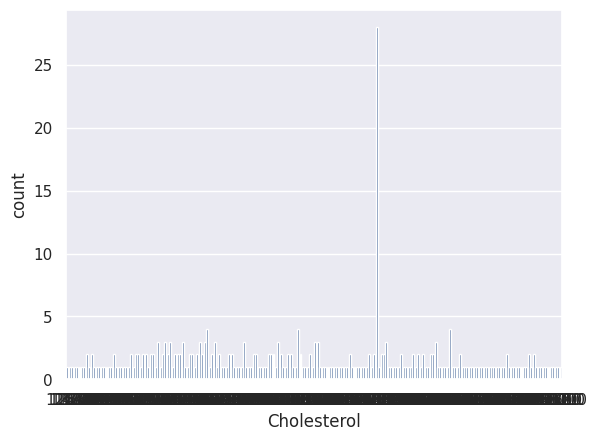

In [ ]:
sns.countplot(x = df_cirroz['Cholesterol'])

(array([ 2.,  4., 10., 21., 39., 86., 82., 50., 14.,  4.]),
 array([1.96 , 2.228, 2.496, 2.764, 3.032, 3.3  , 3.568, 3.836, 4.104,
        4.372, 4.64 ]),
 <BarContainer object of 10 artists>)

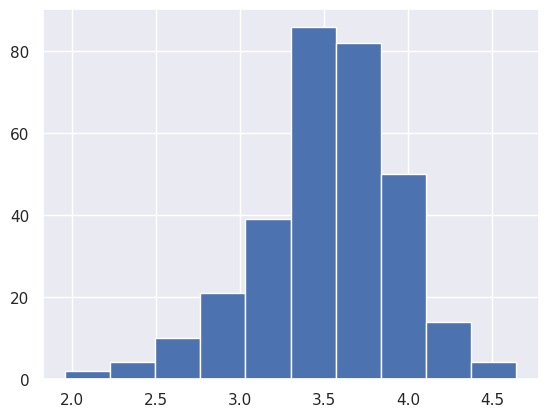

In [ ]:
plt.hist(df_cirroz['Albumin'])
# альбумин

<Axes: xlabel='Albumin', ylabel='count'>

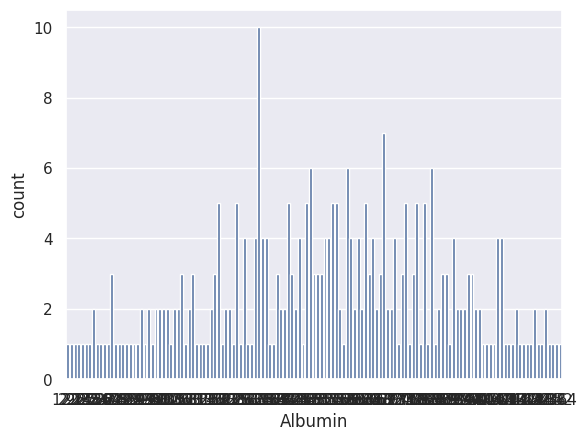

In [ ]:
sns.countplot(x = df_cirroz['Albumin'])

(array([131.,  96.,  42.,  25.,  10.,   1.,   3.,   2.,   0.,   2.]),
 array([  4. ,  62.4, 120.8, 179.2, 237.6, 296. , 354.4, 412.8, 471.2,
        529.6, 588. ]),
 <BarContainer object of 10 artists>)

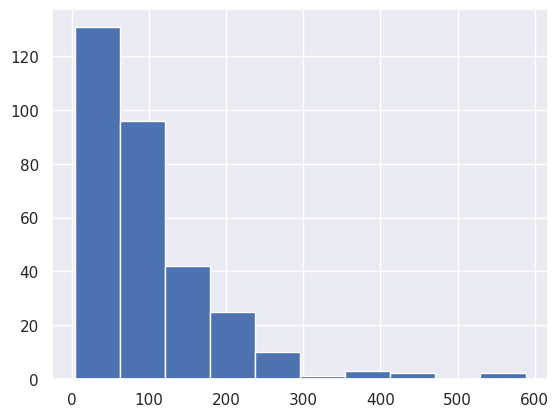

In [ ]:
plt.hist(df_cirroz['Copper'])
# Медь

<Axes: xlabel='Copper', ylabel='count'>

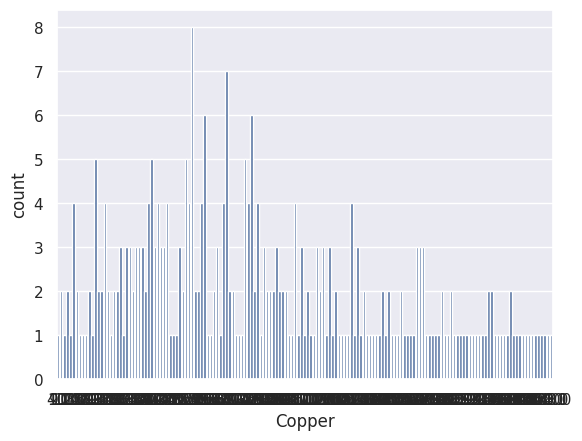

In [ ]:
sns.countplot(x = df_cirroz['Copper'])

(array([202.,  67.,  14.,   7.,   7.,   4.,   3.,   4.,   3.,   1.]),
 array([  289.  ,  1646.34,  3003.68,  4361.02,  5718.36,  7075.7 ,
         8433.04,  9790.38, 11147.72, 12505.06, 13862.4 ]),
 <BarContainer object of 10 artists>)

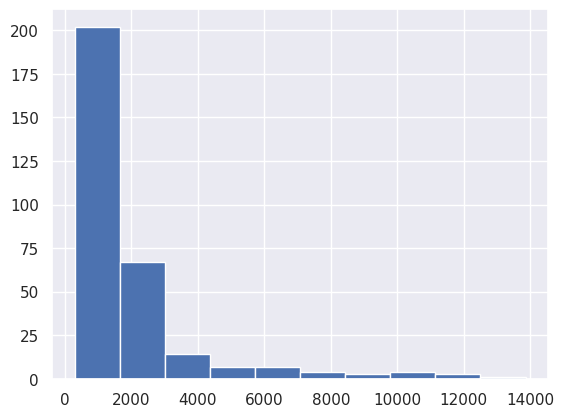

In [ ]:
plt.hist(df_cirroz['Alk_Phos'])
# щелочная фосфатаза

<Axes: xlabel='Alk_Phos', ylabel='count'>

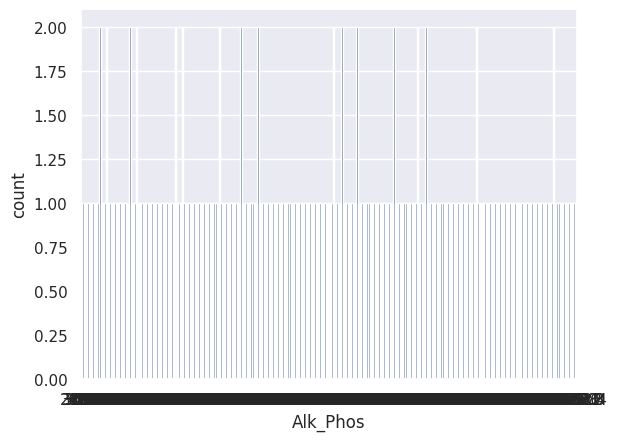

In [ ]:
sns.countplot(x = df_cirroz['Alk_Phos'])

(array([ 42., 110.,  89.,  44.,  18.,   4.,   2.,   2.,   0.,   1.]),
 array([ 26.35,  69.44, 112.53, 155.62, 198.71, 241.8 , 284.89, 327.98,
        371.07, 414.16, 457.25]),
 <BarContainer object of 10 artists>)

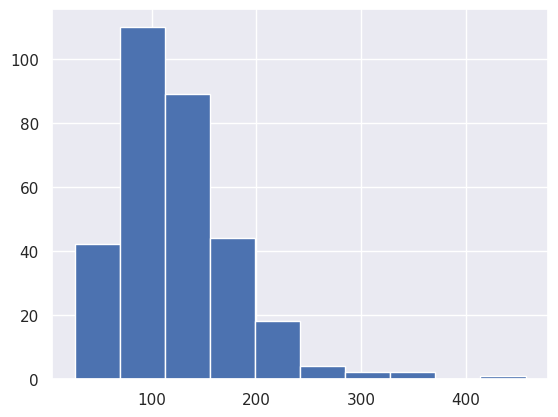

In [ ]:
plt.hist(df_cirroz['SGOT'])
# SGOT

<Axes: xlabel='SGOT', ylabel='count'>

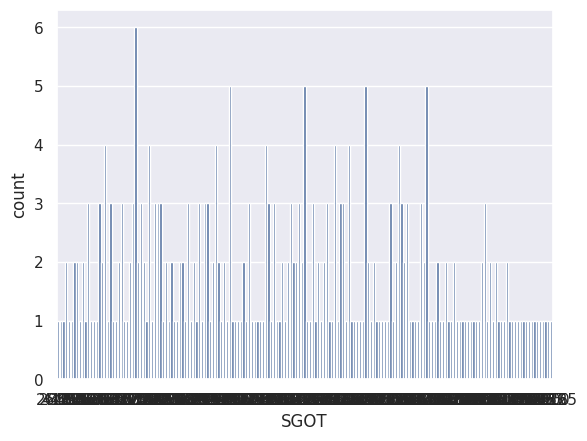

In [ ]:
sns.countplot(x = df_cirroz['SGOT'])

(array([ 86., 148.,  51.,  17.,   4.,   3.,   1.,   1.,   0.,   1.]),
 array([ 33. ,  89.5, 146. , 202.5, 259. , 315.5, 372. , 428.5, 485. ,
        541.5, 598. ]),
 <BarContainer object of 10 artists>)

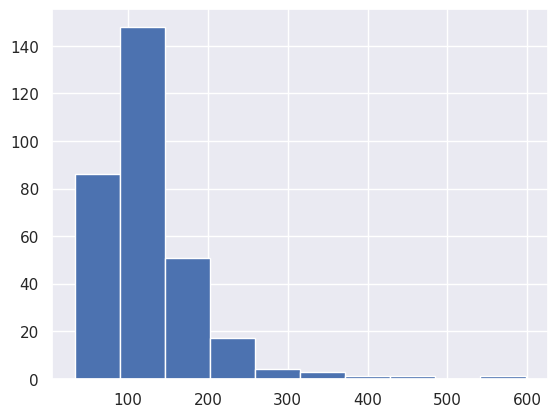

In [ ]:
plt.hist(df_cirroz['Tryglicerides'])
# триглицериды

<Axes: xlabel='Tryglicerides', ylabel='count'>

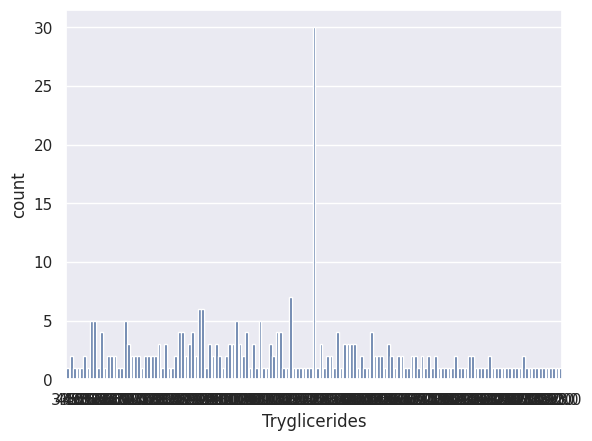

In [ ]:
sns.countplot(x = df_cirroz['Tryglicerides'])

(array([14., 34., 45., 69., 64., 46., 16., 15.,  5.,  4.]),
 array([ 62. , 112.1, 162.2, 212.3, 262.4, 312.5, 362.6, 412.7, 462.8,
        512.9, 563. ]),
 <BarContainer object of 10 artists>)

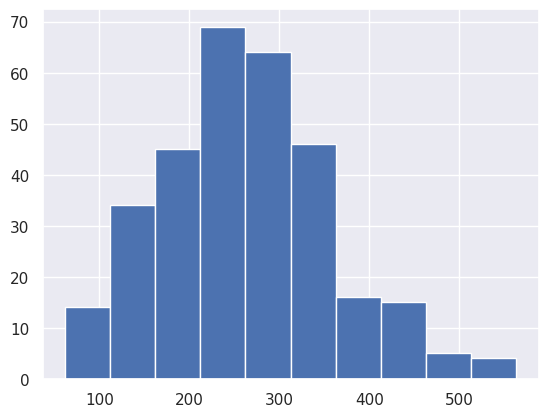

In [ ]:
plt.hist(df_cirroz['Platelets'])
# Тромбоциты

<Axes: xlabel='Platelets', ylabel='count'>

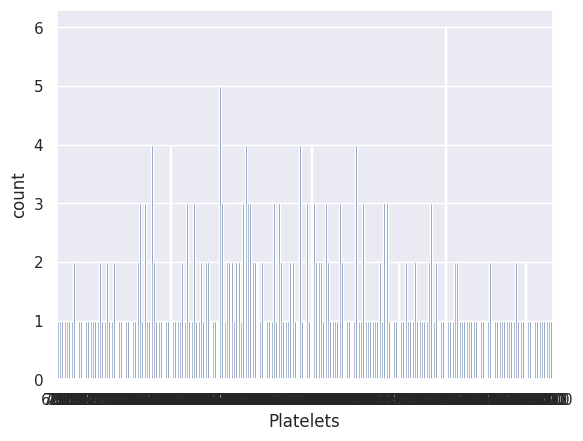

In [ ]:
sns.countplot(x = df_cirroz['Platelets'])

(array([ 53., 121.,  79.,  36.,  15.,   5.,   1.,   1.,   0.,   1.]),
 array([ 9.  ,  9.81, 10.62, 11.43, 12.24, 13.05, 13.86, 14.67, 15.48,
        16.29, 17.1 ]),
 <BarContainer object of 10 artists>)

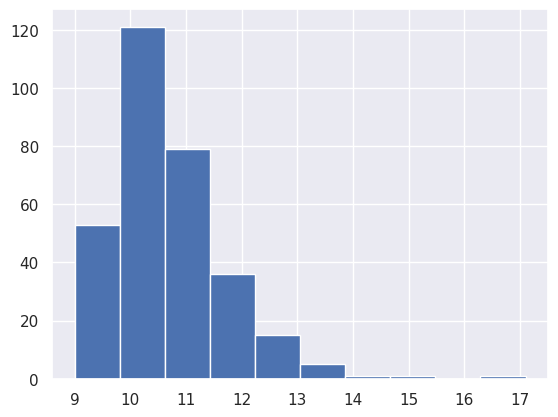

In [ ]:
plt.hist(df_cirroz['Prothrombin'])
# Протромбин

<Axes: xlabel='Prothrombin', ylabel='count'>

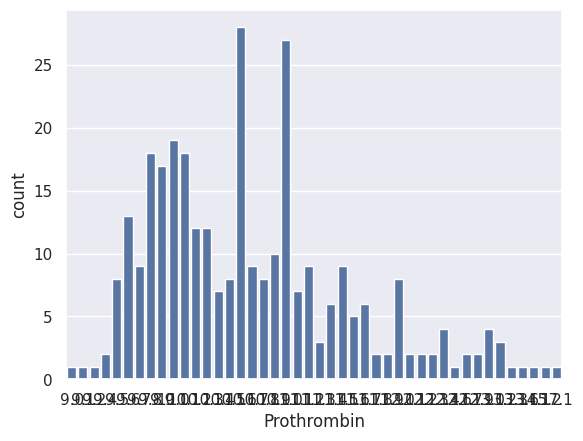

In [ ]:
sns.countplot(x = df_cirroz['Prothrombin'])

(array([ 16.,   0.,   0.,  67.,   0.,   0., 120.,   0.,   0., 109.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

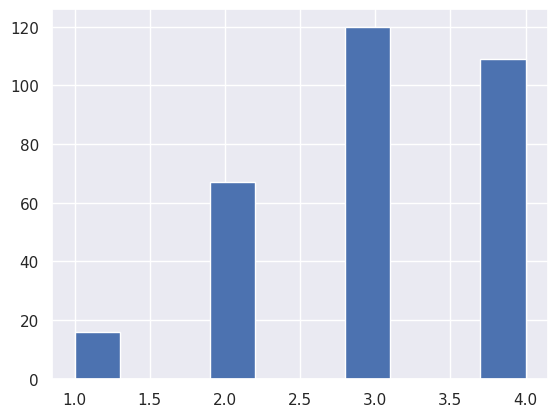

In [ ]:
plt.hist(df_cirroz['Stage'])
# гистологическая стадия заболевания (1, 2, 3 или 4)

<Axes: xlabel='Stage', ylabel='count'>

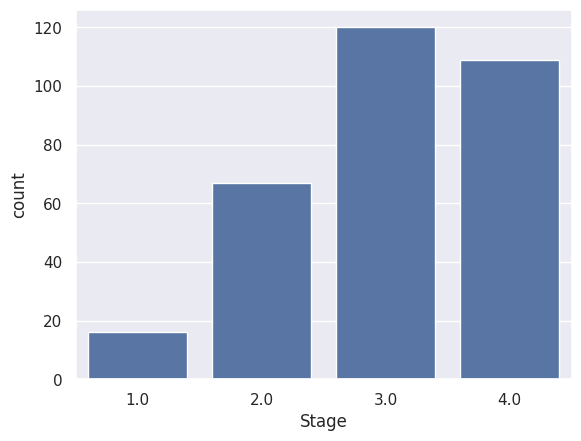

In [ ]:
sns.countplot(x = df_cirroz['Stage'])

 **3 групповые визуализаций.**

<Axes: >

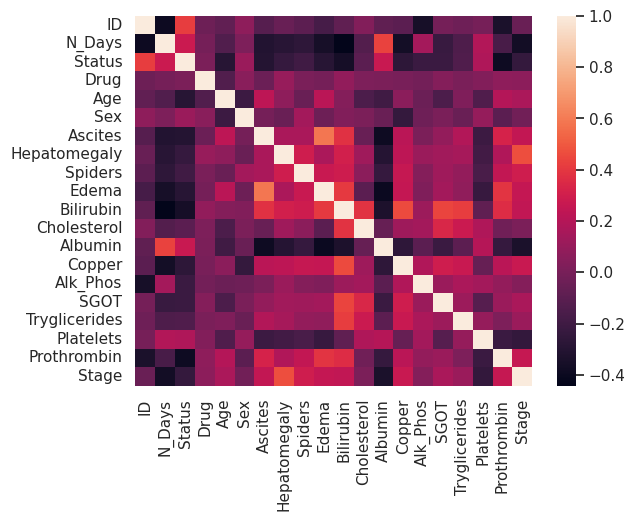

In [ ]:
sns.heatmap(df_cirroz.corr(numeric_only = True))

<Axes: xlabel='Drug', ylabel='Count'>

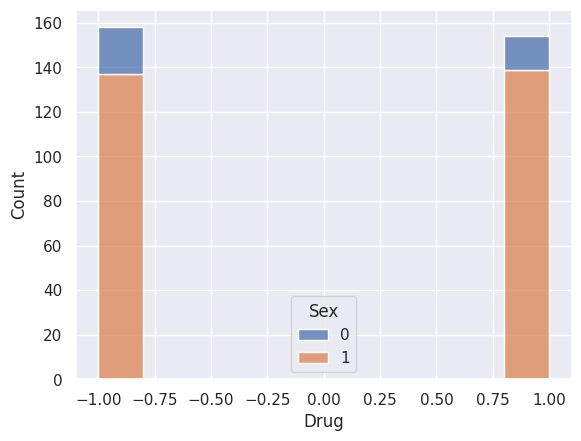

In [ ]:
sns.histplot(df_cirroz, x = 'Drug', hue = 'Sex', multiple = 'stack')

<Axes: xlabel='Status', ylabel='count'>

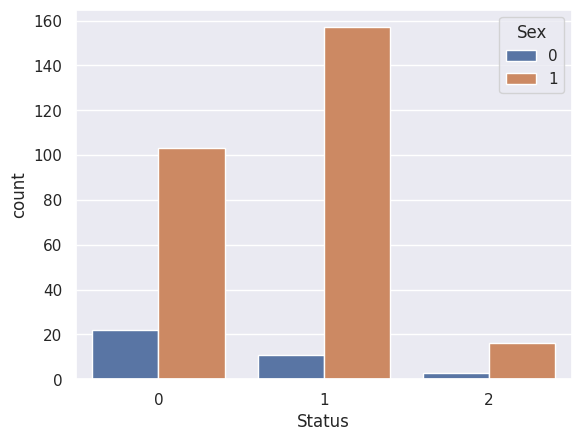

In [ ]:
sns.countplot(data = df_cirroz, x = 'Status', hue = 'Sex')

<Axes: xlabel='Cholesterol', ylabel='Age'>

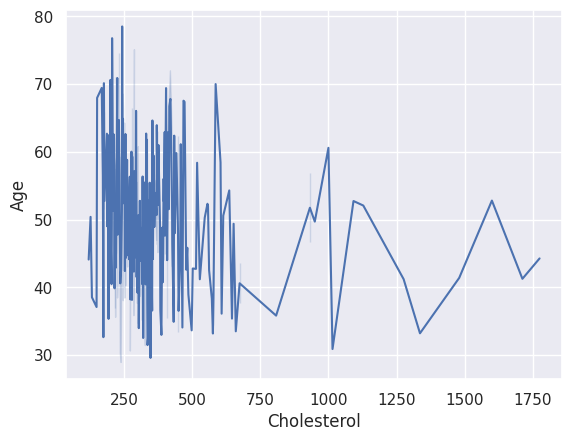

In [ ]:
sns.lineplot(data = df_cirroz, x = 'Cholesterol', y = 'Age')

<Axes: xlabel='Status', ylabel='Count'>

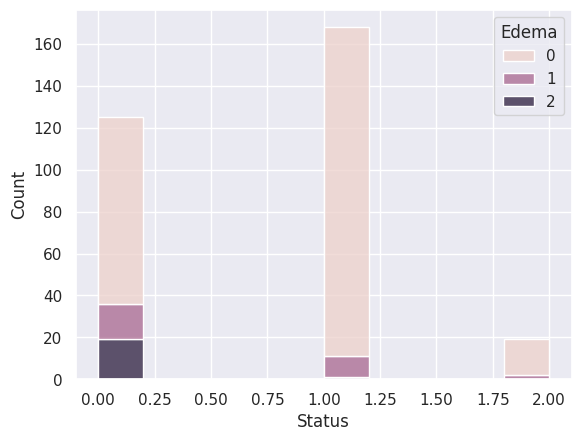

In [ ]:
sns.histplot(df_cirroz, x = 'Status', hue = 'Edema', multiple="stack" )